In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from wordcloud import WordCloud

#from shapely.geometry import Point
#import geopandas as gpd
#from geopandas import GeoDataFrame

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [9]:
#selecting important features

data=df[['customer_id','age','txn_description',"balance","amount"]]


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      12043 non-null  object 
 1   age              12043 non-null  int64  
 2   txn_description  12043 non-null  object 
 3   balance          12043 non-null  float64
 4   amount           12043 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 470.6+ KB


In [11]:
# finding average salary of each customers

salary=data[data['txn_description']=='PAY/SALARY'].groupby('customer_id').mean().reset_index()
salary=salary[['customer_id','amount']]
salary=salary.rename(columns={'amount':"salary"})
salary.head()

customer_id   salary
0  CUS-1005756958   970.47
1  CUS-1117979751  3578.65
2  CUS-1140341822  1916.51
3  CUS-1147642491  1711.39
4  CUS-1196156254  3903.73

In [12]:
data=data.groupby('customer_id').mean().reset_index()
data.head()

customer_id  age       balance      amount
0  CUS-1005756958   53   2275.852055  222.862603
1  CUS-1117979751   21   9829.929000  339.843700
2  CUS-1140341822   28   5699.212250  212.632500
3  CUS-1147642491   34   9032.841186  245.600169
4  CUS-1196156254   34  22272.433755  147.145796

In [14]:
data=pd.merge(data,salary, on='customer_id')
data.describe()

age        balance      amount      salary
count  100.000000     100.000000  100.000000   100.00000
mean    31.770000   17626.610965  228.868607  2297.27390
std     11.544254   35372.128940  113.294434  1397.78397
min     18.000000    1191.291419   45.348772   576.00000
25%     22.000000    4509.250867  156.447244  1153.31000
50%     29.500000    7015.089269  208.058340  1949.43000
75%     39.250000   12223.481379  281.132678  2886.72500
max     78.000000  263753.766119  693.632903  8835.98000

## plotting
###  Salary v/s  Age , Salary v/s Account Balance, Salary v/s Transaction Amount , Salary distribution


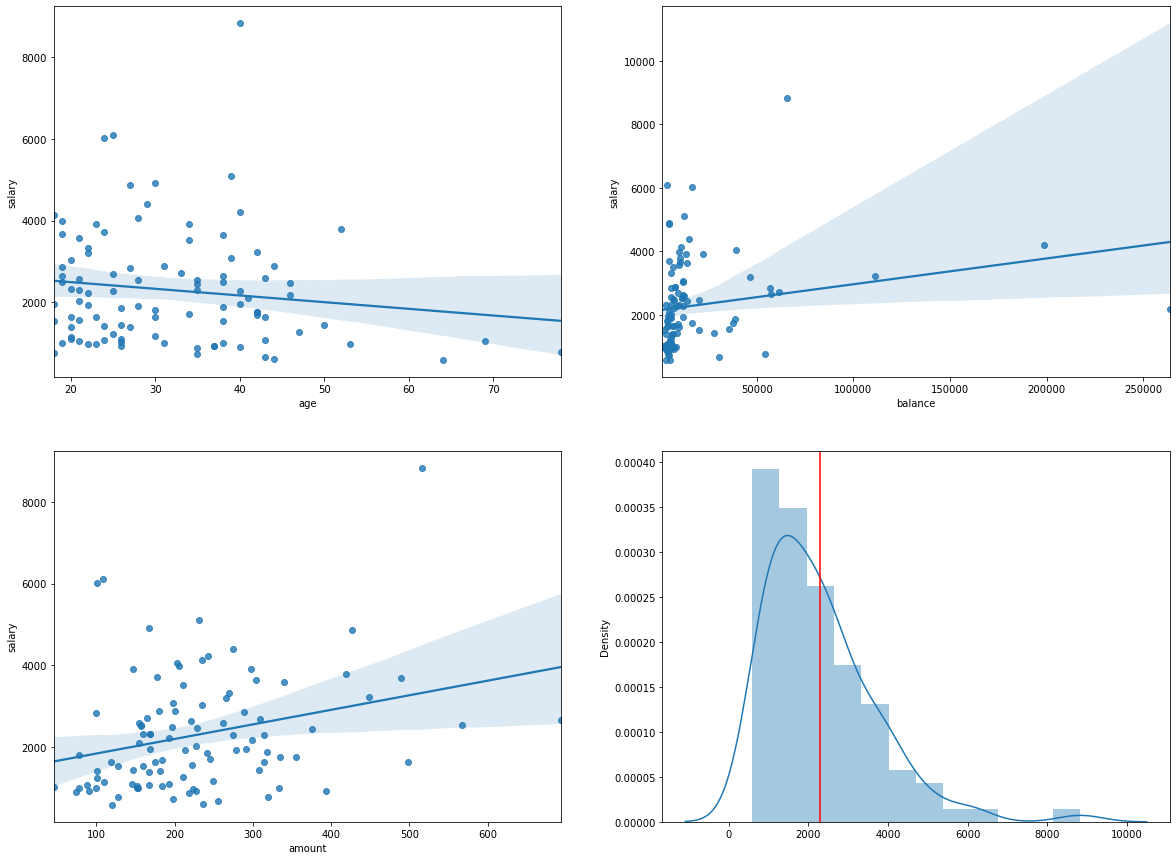

In [21]:
fig,axes=plt.subplots(2,2, figsize=(20,15))

# Age vs salary
sns.regplot(ax=axes[0,0],x='age',y='salary',data=data)

# Salary v/s Account Balance
sns.regplot(ax=axes[0,1],x='balance',y='salary',data=data)

# Salary v/s Transaction Amount
sns.regplot(ax=axes[1,0],x='amount',y='salary',data=data )

#Salary distribution
mean=data['salary'].mean()
sns.distplot(ax=axes[1,1], x=data['salary'])
plt.axvline(mean,color='red')

# ExploratoryDataAnalysis.

In [23]:
df['account'].nunique()

100

In [24]:
df['date'].nunique()

91

In [25]:
df['customer_id'].nunique()

100

In [29]:
df.columns.values

array(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'], dtype=object)

## Transaction count over dates

In [47]:
date_group = df.groupby('date')['amount'].count().reset_index()
date_group.head()
date_group=date_group.rename(columns={"amount":"N.Of Transaction / day"})

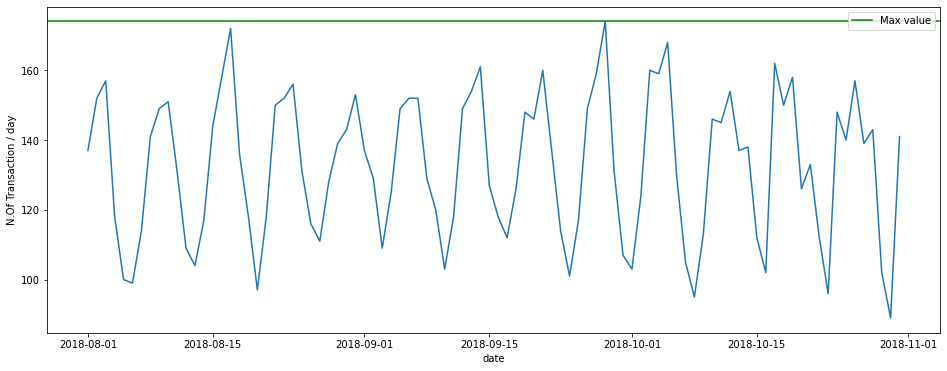

In [88]:
max=date_group['N.Of Transaction / day'].max()
plt.figure(figsize=(16,6))
sns.lineplot(x='date',y='N.Of Transaction / day',data=date_group)
plt.axhline(max,color='g',label='Max value',)

plt.legend(loc='upper right')
plt.show()

## Mean transaction amount per day

In [89]:
date_mean_amount = df.groupby('date')['amount'].mean().reset_index()
date_mean_amount.head()

date      amount
0 2018-08-01  218.014161
1 2018-08-02  143.331053
2 2018-08-03  242.653376
3 2018-08-04   53.356356
4 2018-08-05   44.265000

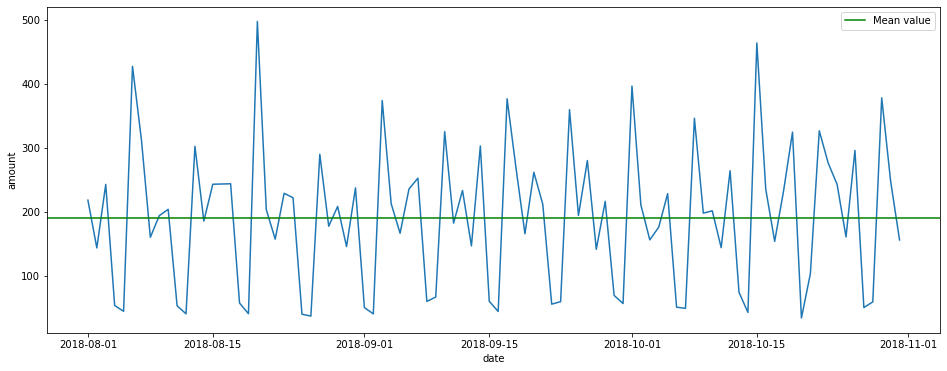

In [95]:
mean=date_mean_amount['amount'].mean()
plt.figure(figsize=(16,6))
sns.lineplot(x='date',y='amount',data=date_mean_amount)
plt.axhline(mean, color='g',label='Mean value',)
plt.legend(loc='upper right')

plt.show()

## Transaction volume by gender

In [129]:
gender_data = df.groupby(['date',"gender"])["amount"].count().reset_index()
gender_data=gender_data.rename(columns={'amount':'Num. of trans.'})
gender_data.head()

date gender  Num. of trans.
0 2018-08-01      F              71
1 2018-08-01      M              66
2 2018-08-02      F              69
3 2018-08-02      M              83
4 2018-08-03      F              79

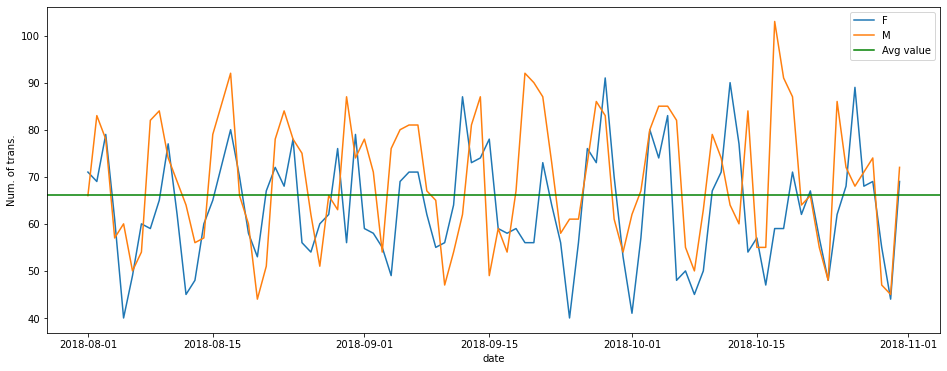

In [135]:
max=gender_data['Num. of trans.'].mean()
plt.figure(figsize=(16, 6))
sns.lineplot(y="Num. of trans.",x="date",hue="gender",data=gender_data)
plt.axhline(max,color='g',label='Avg value',)
plt.legend(loc='upper right')


## Mean transaction amount by gender

In [133]:
gender_mean_amount=df.groupby(['date',"gender"])["amount"].mean().reset_index()
gender_mean_amount.head()

date gender      amount
0 2018-08-01      F  191.952676
1 2018-08-01      M  246.050000
2 2018-08-02      F   85.452899
3 2018-08-02      M  191.446627
4 2018-08-03      F  216.349241

<AxesSubplot:xlabel='date', ylabel='amount'>

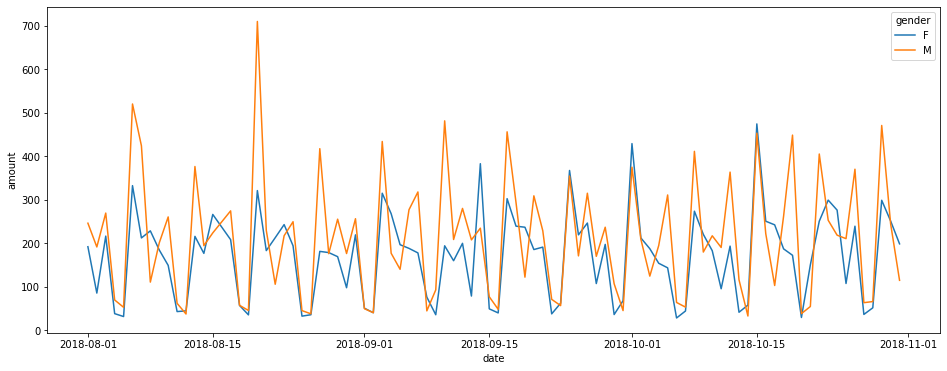

In [134]:
plt.figure(figsize=(16, 6))
sns.lineplot(y="amount",x="date",hue="gender", data=gender_mean_amount)

## Transaction volume by merchant state

In [150]:
merchant_state = df.groupby(["date","merchant_state"])["amount"].sum().reset_index()
merchant_state.head()

date merchant_state  amount
0 2018-08-01            NSW  828.36
1 2018-08-01             NT   73.25
2 2018-08-01            QLD  921.76
3 2018-08-01             SA   62.37
4 2018-08-01            TAS   17.13

<AxesSubplot:xlabel='date', ylabel='amount'>

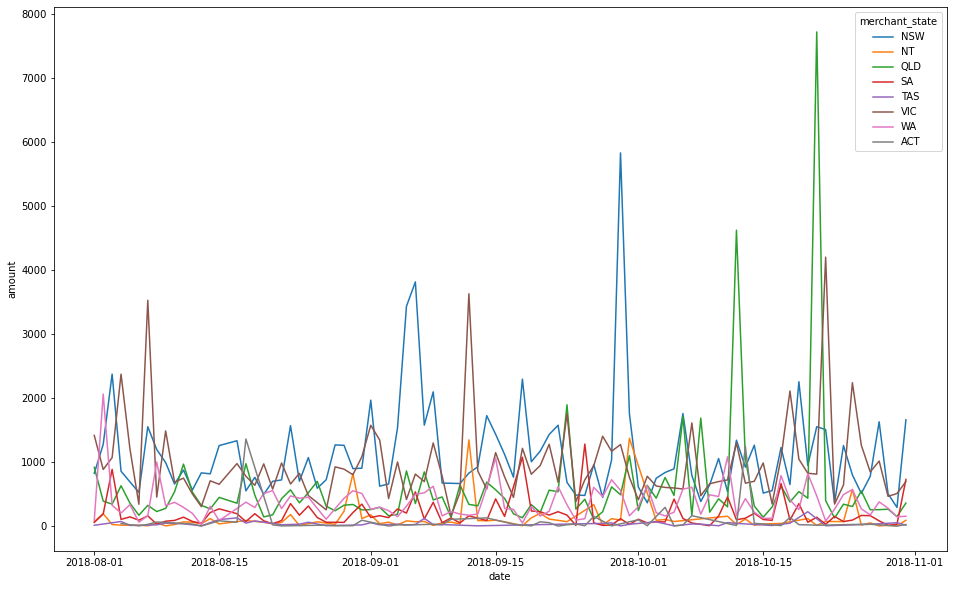

In [151]:
plt.figure(figsize=(16, 10))
sns.lineplot(y="amount",x="date",hue="merchant_state", data=merchant_state)

## Transaction volume by merchant state (barplot)

In [154]:
merchant_state_total=df.groupby(['merchant_state','gender'])['amount'].sum().reset_index()
merchant_state_total.head()

merchant_state gender    amount
0            ACT      F   1657.44
1            ACT      M   3219.24
2            NSW      F  41430.88
3            NSW      M  60590.89
4             NT      F   8741.42

<AxesSubplot:xlabel='merchant_state', ylabel='amount'>

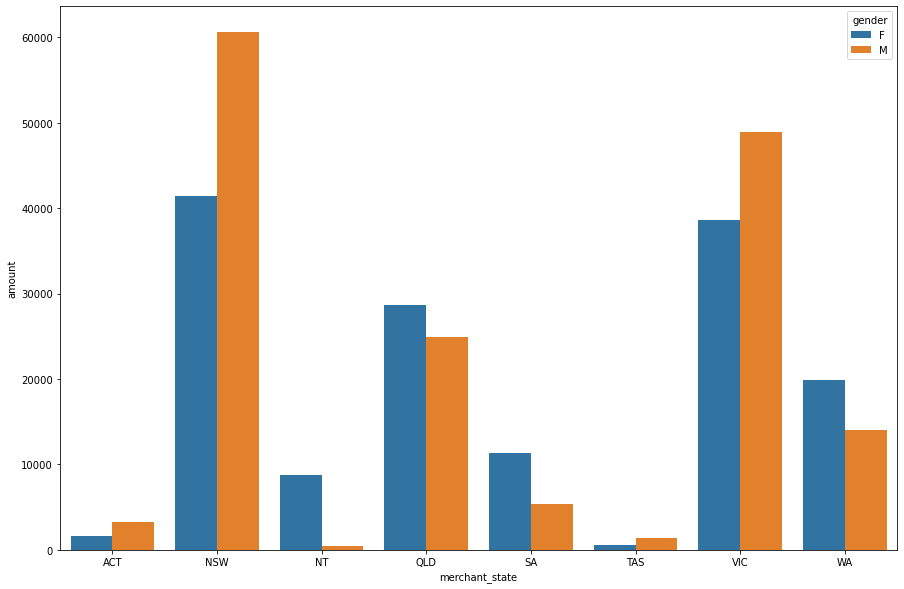

In [155]:
plt.figure(figsize=(15, 10))
sns.barplot(x="merchant_state", y="amount",  data=merchant_state_total, hue="gender")

## Mean transaction volume by merchant state

In [157]:
merchant_state_mean = df.groupby(["date","merchant_state"])["amount"].mean().reset_index()
merchant_state_mean.head()

date merchant_state     amount
0 2018-08-01            NSW  29.584286
1 2018-08-01             NT  24.416667
2 2018-08-01            QLD  54.221176
3 2018-08-01             SA  15.592500
4 2018-08-01            TAS  17.130000

<AxesSubplot:xlabel='date', ylabel='amount'>

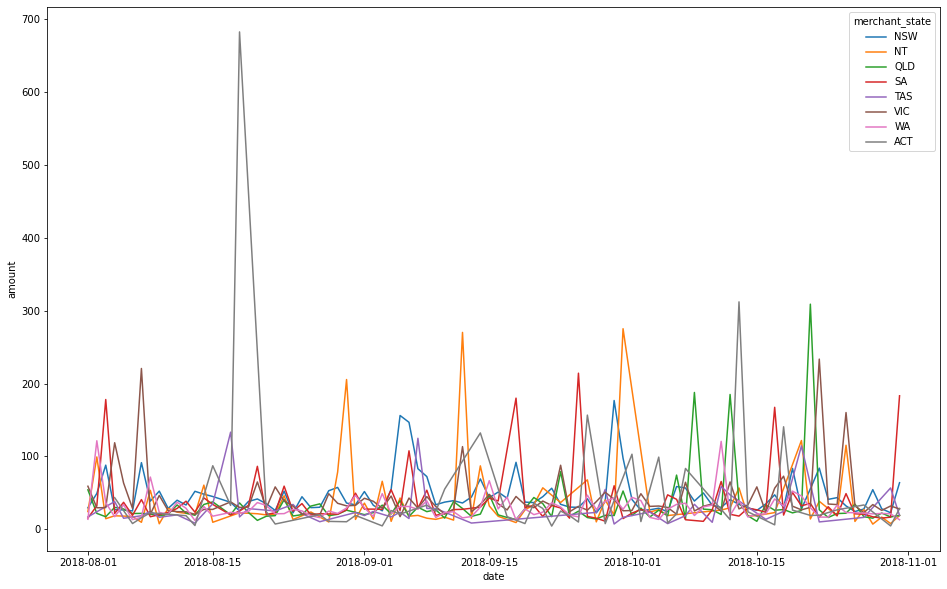

In [158]:
plt.figure(figsize=(16, 10))
sns.lineplot(y="amount",x="date",hue="merchant_state", data=merchant_state_mean)

## Transaction volume by merchant suburb (sum)

In [165]:
merchant_suburb= df.groupby(["merchant_suburb"])["amount"].sum().reset_index()
merchant_suburb.head()

merchant_suburb   amount
0      Abbotsford  2004.29
1        Aberdeen    52.45
2      Aberfeldie    57.77
3  Aberfoyle Park    84.92
4    Acacia Ridge    10.30

In [166]:
suburb_sorted=merchant_suburb.sort_values(by='amount', ascending=False)
print("Top 10 regions with most value of transactions over 91 days are-")
print(suburb_sorted.head(10).values)

Top 10 regions with most value of transactions over 91 days are-
[['Sydney' 21675.44000000002]
 ['Melbourne' 11943.529999999995]
 ['South Brisbane' 11740.58]
 ['Mascot' 10282.619999999999]
 ['Mount Gambier' 4710.25]
 ['Malvern' 3994.8300000000004]
 ['Maribyrnong' 3770.8299999999995]
 ['Parap' 3323.51]
 ['Brisbane City' 2724.45]
 ['Mount Gravatt' 2721.14]]


In [175]:
tuple_suburb_sum = [tuple(x) for x in merchant_suburb.values]


(-0.5, 1399.5, 1199.5, -0.5)

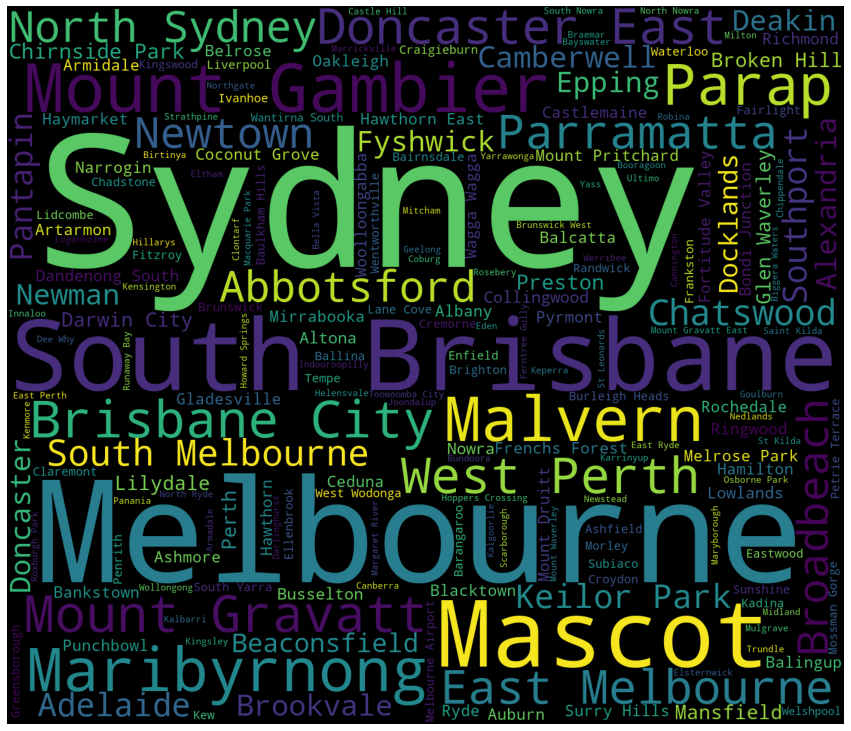

In [174]:
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(width=1400,height=1200).generate_from_frequencies(dict(tuple_suburb_sum))
plt.imshow(wordcloud)
plt.axis("off")

In [191]:
deb_cred = df.groupby(['movement','age'])['amount'].sum().reset_index()
deb_cred 

movement  age     amount
0    credit   18   59762.72
1    credit   19  115785.36
2    credit   20   84511.81
3    credit   21  107137.60
4    credit   22   81124.69
..      ...  ...        ...
61    debit   52    5742.71
62    debit   53    3652.86
63    debit   64    3099.42
64    debit   69    4076.54
65    debit   78    1456.21

[66 rows x 3 columns]

<AxesSubplot:xlabel='movement', ylabel='amount'>

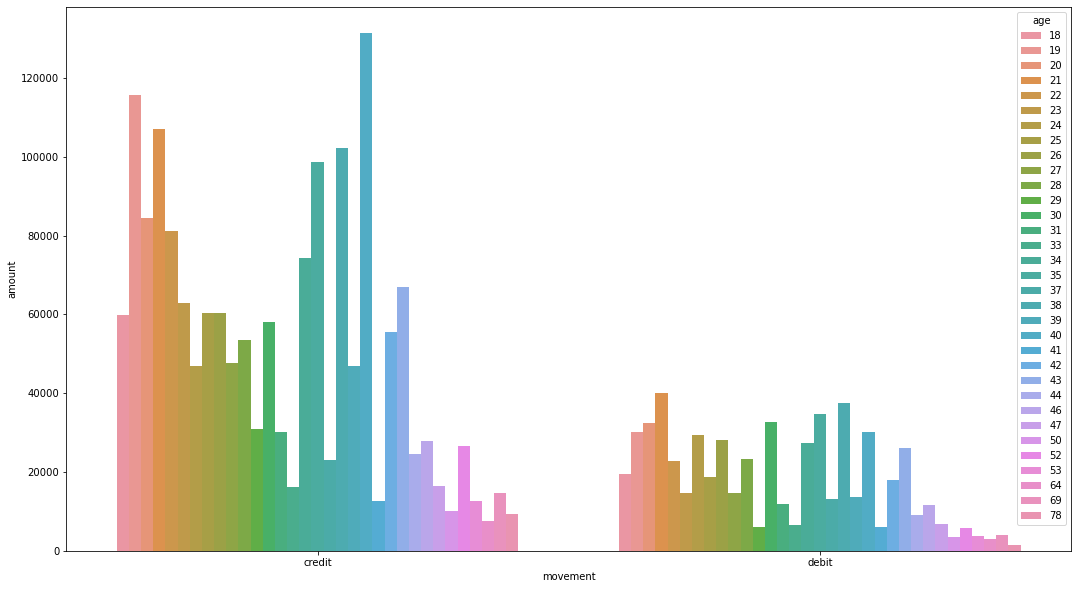

In [192]:
plt.figure(figsize=(18, 10))
sns.barplot(y="amount", x="movement", hue="age", data=deb_cred)

In [214]:
bal_movement = df.groupby(['status','movement','txn_description'])['balance','amount'].sum().reset_index()
bal_movement 

status movement txn_description      balance      amount
0  authorized    debit             POS  44907895.20   152861.24
1  authorized    debit       SALES-POS  46701048.47   157005.11
2      posted   credit      PAY/SALARY  14342444.54  1676576.85
3      posted    debit      INTER BANK  17676922.73    64331.00
4      posted    debit         PAYMENT  49642900.35   201794.00
5      posted    debit      PHONE BANK   3811415.76    10716.00

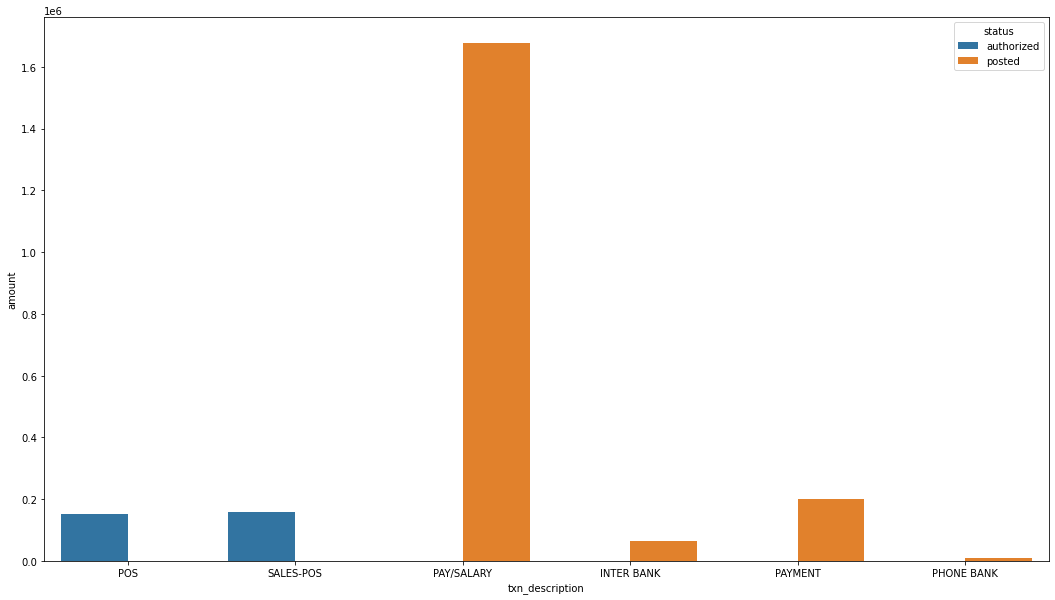

In [224]:

plt.figure(figsize=(18, 10))
sns.barplot(y="amount", x="txn_description", hue="status", data=bal_movement,)
#sns.barplot(y="balance", x="movement", hue="status", data=bal_movement,alpha=0.2)
sns.color_palette("mako", as_cmap=True)